**zeeman effect**

In this experiment the splitting of spectral lines in the magnetic field is observed; from this the distance factor, which is closely linked to the land factor, is determined. In addition, the polarization of the spectral lines in the transverse and longitudinal direction to the magnetic field is checked.

In [21]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
from statistics import mean 

In [22]:
#X is the current
#Y is the Magnetfield

X = np.array([0.65, 2.34, 3.60, 4.52, 5.65, 6.41, 7.71]).reshape((-1, 1))
Y = np.array([0.028, 0.137, 0.205, 0.263, 0.329, 0.376, 0.449])


In [23]:
#Fitting a linear regression
regr = linear_model.LinearRegression()
regr.fit (X, Y)

#Y=mX+b; where m is the Coefficients and b is the Intercept
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [0.05949378]
Intercept:  -0.007166854899689434


In [24]:
#Residual sum
Y_pre=regr.coef_[0]*X + regr.intercept_
Y_pre
Y_act=np.array([0.028, 0.137, 0.205, 0.263, 0.329, 0.376, 0.449]).reshape((-1, 1))
((Y_pre-Y_act)**2).sum()

5.209819811123464e-05

Text(0.5, 1.0, 'Teilversuch 1')

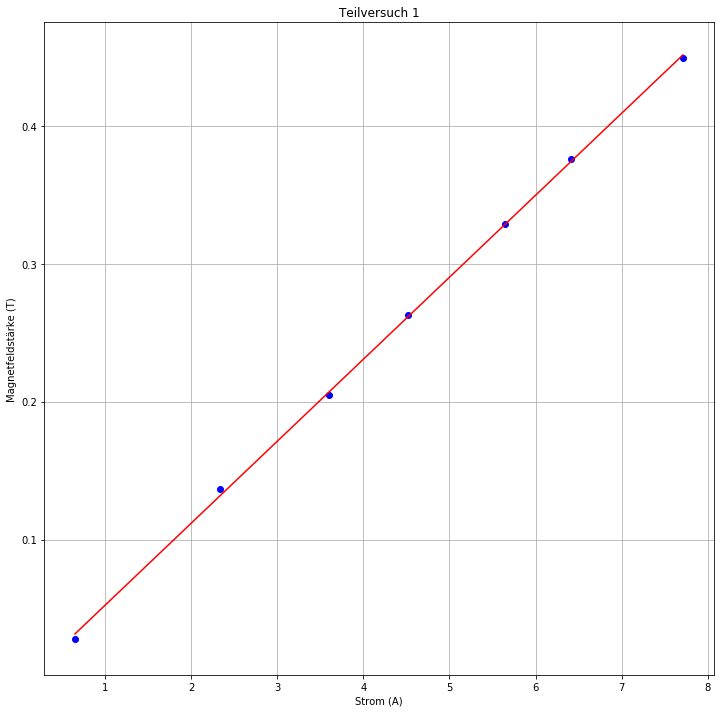

In [25]:
#plotting the magnetic field against the current:

plt.figure(figsize=(12, 12))
plt.scatter(X, Y,  color='blue')
plt.plot(X, regr.coef_[0]*X + regr.intercept_, '-r')
plt.grid()
plt.xlabel("Strom (A)")
plt.ylabel("Magnetfeldstärke (T)")
plt.title('Teilversuch 1')

In [26]:
#We have two different kind of radius. r_1 is for positive energy shift and r_2 for the negative energy shift.
#X_1 = X_2 are the index of each ring
#as one example, for I=5.45 A we have:

X_1=X_2=P=np.array([1,2,3]).reshape((-1, 1))
r_1=np.array([31.53,55.09,69.62])
Y_1=r_1**2
r_2=np.array([42.39,61.49,74.35])
Y_2=r_2**2




In [27]:
#fitting two linear regression for two curves

regr_1 = linear_model.LinearRegression()
regr_2 = linear_model.LinearRegression()

regr_1.fit (X_1, Y_1)
regr_2.fit (X_2, Y_2)

print ('Coefficients: ', regr_1.coef_)
print ('Intercept: ',regr_1.intercept_)

print ('Coefficients: ', regr_2.coef_)
print ('Intercept: ',regr_2.intercept_)

Coefficients:  [1926.40175]
Intercept:  -894.1390333333316
Coefficients:  [1865.5052]
Intercept:  -29.058833333329858


Text(0.5, 1.0, 'Teilversuch 1')

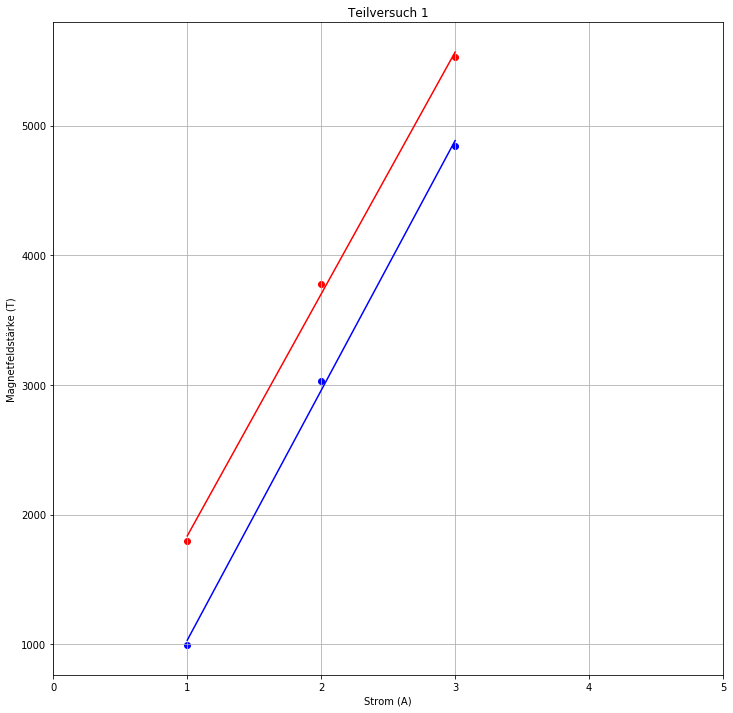

In [28]:
#Plotting both curves in one diagram

plt.figure(figsize=(12, 12))
plt.scatter(X_1, Y_1,  color='blue')
plt.scatter(X_2, Y_2,  color='red')

plt.plot(X_1, regr_1.coef_[0]*X_1 + regr_1.intercept_, '-b')
plt.plot(X_2, regr_2.coef_[0]*X_2 + regr_2.intercept_, '-r')

plt.grid()
plt.xlim(0,+5)
plt.xlabel("Strom (A)")
plt.ylabel("Magnetfeldstärke (T)")
plt.title('Teilversuch 1')

Text(0.5, 1.0, '7.54 A')

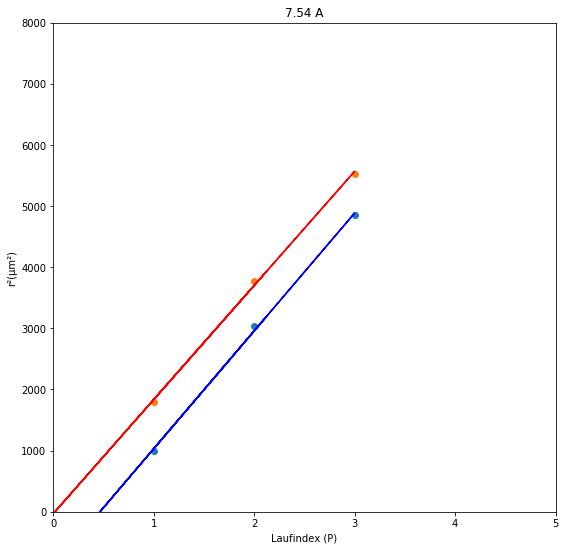

In [29]:
#We want our plot to show us the roots intersections.
#for 5.45 A

plt.figure(figsize=(9, 9))

X_1=X_2=[1,2,3]
Y_1=[31.53**2,55.09**2,69.62**2]
Y_2=[42.39**2,61.49**2,74.35**2]

p1 = np.polyfit(X_1, Y_1, 1)
p2 = np.polyfit(X_2, Y_2, 1)

plt.scatter(X_1, Y_1)
plt.scatter(X_2, Y_2)

xlim = plt.xlim()

xlims = [x -1 for x in xlim]


X_1.append(xlims[0])
X_1.append(xlims[1])

X_2.append(xlims[0])
X_2.append(xlims[1])


Y_1.append(np.polyval(p1, xlims[0]))
Y_1.append(np.polyval(p1, xlims[1]))

Y_2.append(np.polyval(p2, xlims[0]))
Y_2.append(np.polyval(p2, xlims[1]))

plt.plot(X_1, np.polyval(p1,X_1), 'b-', linewidth = 1.5)
plt.plot(X_2, np.polyval(p2,X_2), 'r-', linewidth = 1.5)

plt.xlim(xlims)
plt.xlim(0,+5)
plt.ylim(0,8000)

plt.xlabel("Laufindex (P)")
plt.ylabel("r²(\u03bcm²)")
plt.title('7.54 A')

In [33]:
#We calculate both roots (for both lines):

coeff_1=[1926.40,-894.139]
coeff_2=[1865.50,-29.058]

root_1=np.roots(coeff_1)
root_2=np.roots(coeff_2)
print(root_1, root_2)

#We need these two roots for calculating the difference of Ring index (Delta_P). From Delta_P then we can find the Wavenumber difference.

[0.46415023] [0.01557652]


In [34]:
#Here we want to plot Wavenumber difference/2 (Delta_k/2) against Magnetic field. x is the magnetic field and y is Delta_k/2.
x = np.array([0.209, 0.327, 0.382, 0.452, 0.514]).reshape((-1, 1))
y = np.array([21.49, 21.55, 23.68, 25.80, 30.57])

In [35]:
#Fitting a linear Regression to the curve

regr = linear_model.LinearRegression()
regr.fit (x, y)

#Y=mX+b
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [28.62183277]
Intercept:  13.833293412739291


In [147]:
#Residual sum
y_pre=regr.coef_[0]*x + regr.intercept_
y_pre
y_act=np.array([21.49, 21.55, 23.68, 25.80, 30.57]).reshape((-1, 1))
((y_pre-y_act)**2).sum()

11.726784803093054

Text(0.5, 1.0, 'Δ k/2 =46.686 B.g')

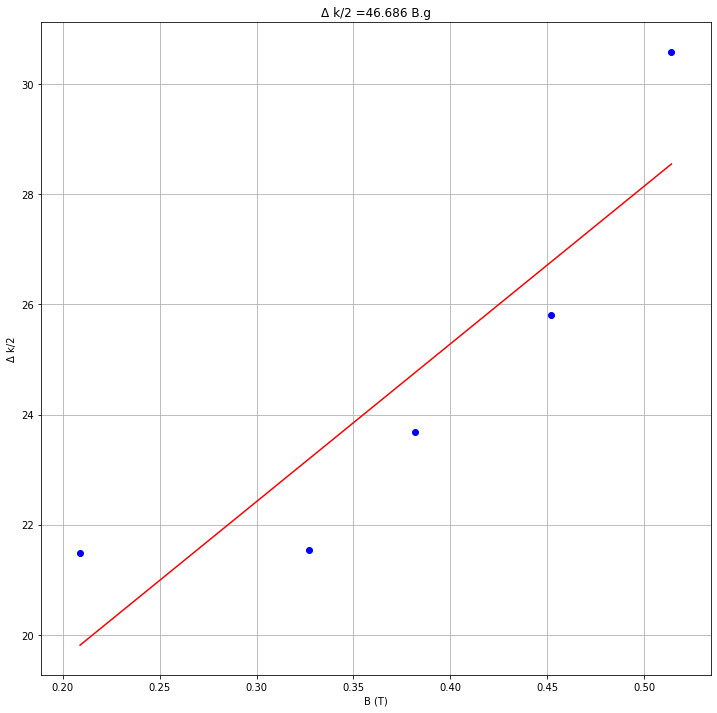

In [37]:
#plotting Delta_k/2 against B:

plt.figure(figsize=(12, 12))
plt.scatter(x, y,  color='blue')
plt.plot(x, regr.coef_[0]*x + regr.intercept_, '-r')
plt.grid()
plt.xlabel("B (T)")
plt.ylabel("\u0394 k/2")
plt.title('\u0394 k/2 =46.686 B.g')

**Conclusion**

The Zeeman effect, discovered in 1896, shows the splitting of atomic energy levels or spectral lines when exposed to an external magnetic field. To explain this, the electron spin hypothesis was introduced in 1925.